In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-04-20 13:10:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.1'

m4_survey_data.sqli 100%[===================>]  34.98M   868KB/s    in 13s     

2024-04-20 13:10:54 (2.70 MB/s) - 'm4_survey_data.sqlite.1' saved [36679680/36679680]



In [12]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [13]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


In [14]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [15]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [16]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

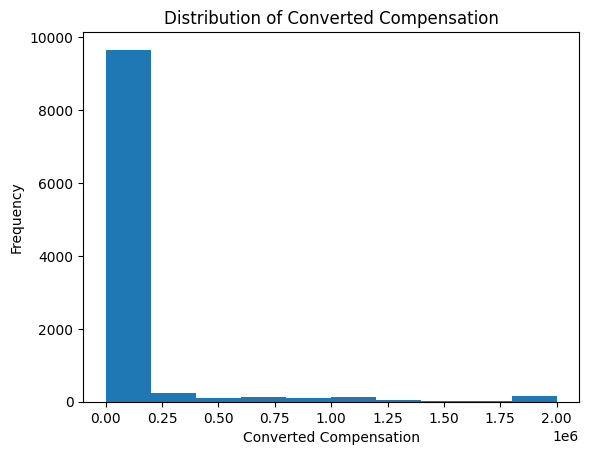

In [17]:
import matplotlib.pyplot as plt

query = "SELECT ConvertedComp FROM master"
data = pd.read_sql_query(query, conn)

# Plotting the distribution curve for the 'ConvertedComp' column
plt.hist(data['ConvertedComp'], bins=10)

# Adding labels and title
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')

# Displaying the plot
plt.show()


Note: you may need to restart the kernel to use updated packages.


<Axes: >

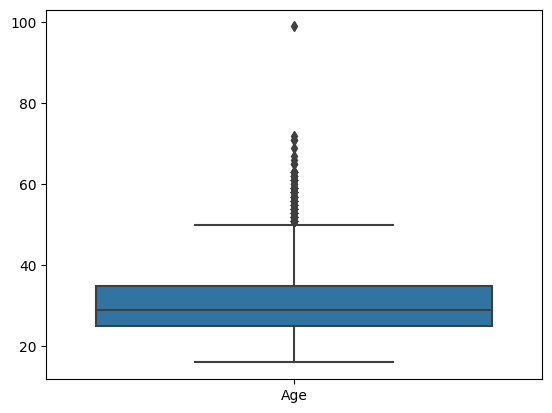

In [18]:
query = "SELECT Age FROM master"
data_age = pd.read_sql_query(query, conn)
data_age.head()

%pip install seaborn
import seaborn as sns

# Plotting the distribution curve for the 'ConvertedComp' column
sns.boxplot(data = data_age)


(0.0, 80.0)

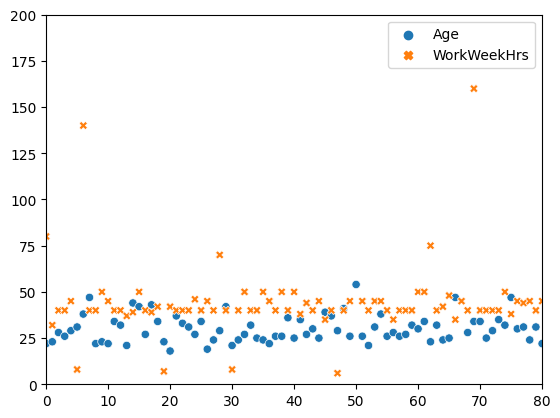

In [19]:
query = """
SELECT Age, WorkWeekHrs
FROM master
"""
df=pd.read_sql_query(query,conn)
sns.scatterplot(data=df)
plt.ylim(0,200)
plt.xlim(0,80)


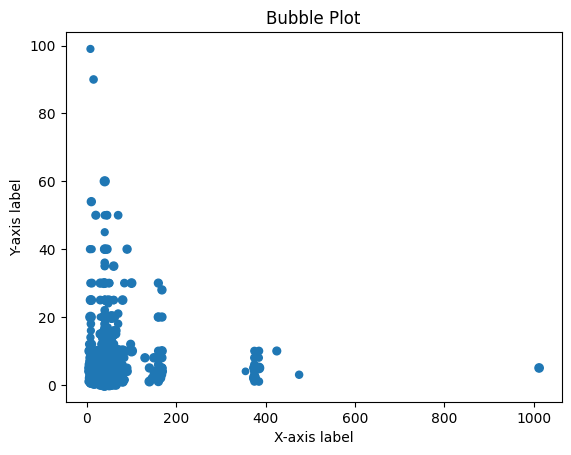

In [20]:
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
data = pd.read_sql_query(query, conn)
plt.scatter(data['WorkWeekHrs'], data['CodeRevHrs'], s=data['Age'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Bubble Plot')
plt.show()


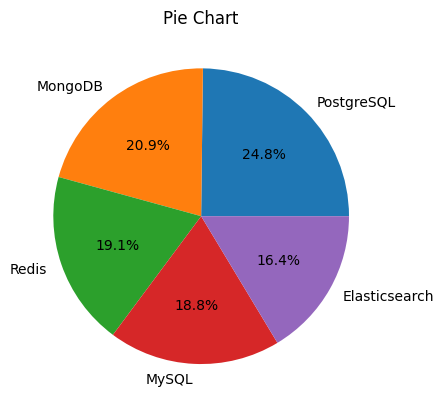

In [21]:
query = "SELECT DatabaseDesireNextYear, COUNT(DatabaseDesireNextYear) AS count FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY count DESC LIMIT 5"
data = pd.read_sql_query(query, conn)

labels = data['DatabaseDesireNextYear'].tolist()
sizes = data['count'].tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')

plt.show()

In [22]:
query = "SELECT LanguageDesireNextYear, COUNT(LanguageDesireNextYear) AS count FROM LanguageDesireNextYear GROUP BY LanguageDesireNextYear ORDER BY count DESC LIMIT 5"
data = pd.read_sql_query(query, conn)
data.head()

,LanguageDesireNextYear,count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [23]:
query = "SELECT LanguageWorkedWith, COUNT(LanguageWorkedWIth) AS count FROM LanguageWorkedWith GROUP BY LanguageWorkedWith ORDER BY count DESC LIMIT 5"
data = pd.read_sql_query(query, conn)
data.head()

,LanguageWorkedWith,count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [24]:
query = "SELECT LanguageWorkedWith, COUNT(LanguageWorkedWith) FROM LanguageWorkedWith GROUP BY LanguageWorkedWith HAVING LanguageWorkedWith = 'SQL'"
data = pd.read_sql_query(query, conn)
data.head()


,LanguageWorkedWith,COUNT(LanguageWorkedWith)
0,SQL,7106


In [25]:
query = "SELECT DevType, COUNT(DevType) FROM DevType GROUP BY DevType ORDER BY COUNT(DevType) DESC"
data = pd.read_sql_query(query, conn)
data.head()

,DevType,COUNT(DevType)
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


Correlation coefficient: 0.10541229990068328


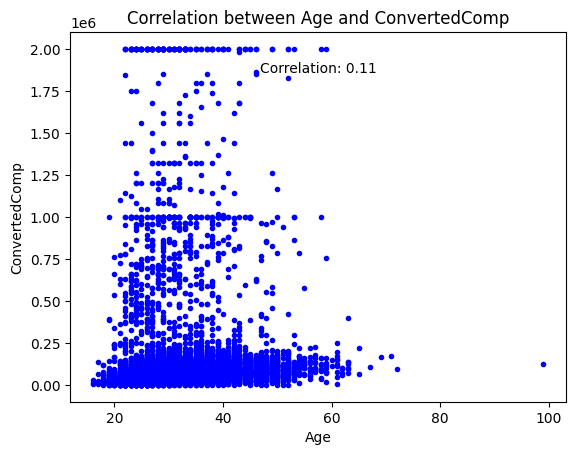

In [26]:
query = "SELECT Age, ConvertedComp FROM master"
data = pd.read_sql_query(query, conn)
data.head()

correlation = data['Age'].corr(data['ConvertedComp'])
print("Correlation coefficient:", correlation)
plt.plot(data['Age'], data['ConvertedComp'], 'b.')
plt.title('Correlation between Age and ConvertedComp')
plt.xlabel('Age')
plt.ylabel('ConvertedComp')
plt.text(0.5, 0.9, 'Correlation: {:.2f}'.format(correlation), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [27]:
#Bar Chart
#Create a horizontal bar chart using column MainBranch.